# Breast Cancer Wisconsin (Diagnostic)

## Importando as libs e dataset

In [1]:
import mlflow
import pycaret.classification as pyc
from sklearn import datasets

d = datasets.load_breast_cancer(as_frame=True)
df = d["data"]
df["y"] = d["target"]

## Criando o setup do modelo

In [2]:
EXPERIMENT_NAME = "exp1"
mlflow.set_experiment(EXPERIMENT_NAME)


# it even has a default train size of 70%
clf1 = pyc.setup(
    df,
    target="y",
    normalize=True,
    log_experiment=True,
    feature_selection_method="boruta",
    experiment_name=EXPERIMENT_NAME)

# if you're using databricks and you can't interact with the notebook
# you'll need to set silent=True and check the columns manually


,Description,Value
0,session_id,2948
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Treinado modelos 

In [3]:
top5_models = pyc.compare_models(
    n_select=5,
    sort="f1")

# use this if you have a non-interactive notebook session
# pyc.pull()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9775,0.9940,0.9923,0.9746,0.9832,0.9493,0.9506,0.2150
knn,K Neighbors Classifier,0.9674,0.9892,0.9845,0.9668,0.9752,0.9275,0.9293,0.1270
et,Extra Trees Classifier,0.9649,0.9911,0.9808,0.9679,0.9735,0.9214,0.9250,0.0460
svm,SVM - Linear Kernel,0.9623,0.0000,0.9728,0.9704,0.9712,0.9167,0.9185,0.0020
rf,Random Forest Classifier,0.9598,0.9893,0.9729,0.9667,0.9693,0.9111,0.9133,0.0600
lda,Linear Discriminant Analysis,0.9572,0.9953,0.9962,0.9435,0.9684,0.9023,0.9086,0.0020
ridge,Ridge Classifier,0.9547,0.0000,0.9962,0.9398,0.9665,0.8967,0.9031,0.0030
lightgbm,Light Gradient Boosting Machine,0.9547,0.9865,0.9768,0.9579,0.9662,0.8977,0.9028,0.0150
qda,Quadratic Discriminant Analysis,0.9549,0.9856,0.9572,0.9734,0.9646,0.9022,0.9048,0.0030
ada,Ada Boost Classifier,0.9523,0.9852,0.9731,0.9575,0.9641,0.8929,0.8976,0.0150


## ML Flow

In [4]:
!mlflow ui

[2022-08-30 22:52:49 -0300] [18905] [INFO] Starting gunicorn 20.1.0
[2022-08-30 22:52:49 -0300] [18905] [INFO] Listening at: http://127.0.0.1:5000 (18905)
[2022-08-30 22:52:49 -0300] [18905] [INFO] Using worker: sync
[2022-08-30 22:52:49 -0300] [18907] [INFO] Booting worker with pid: 18907
^C
[2022-08-30 22:55:34 -0300] [18905] [INFO] Handling signal: int
[2022-08-30 22:55:34 -0300] [18907] [INFO] Worker exiting (pid: 18907)


## Tuning models

In [5]:
tuned_top5 = [
    pyc.tune_model(
        i,
        n_iter=100,
        optimize="f1",
        choose_better=True,
        early_stopping=True)
    for i in top5_models
]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9354,1.0000,0.9286,0.9630,0.8864,0.8921
1,0.9750,1.0000,0.9615,1.0000,0.9804,0.9459,0.9473
2,0.9750,1.0000,0.9615,1.0000,0.9804,0.9459,0.9473
3,0.9750,0.9753,1.0000,0.9630,0.9811,0.9441,0.9456
4,0.9000,0.9780,0.9231,0.9231,0.9231,0.7802,0.7802
5,0.9500,0.9945,0.9231,1.0000,0.9600,0.8936,0.8987
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Misturando modelos

In [6]:

blended = pyc.blend_models(
    tuned_top5,
    choose_better=True,
    optimize="f1")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.0000,1.0000,0.8966,0.9455,0.8266,0.8393
1,0.9750,0.0000,0.9615,1.0000,0.9804,0.9459,0.9473
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9750,0.0000,1.0000,0.9630,0.9811,0.9441,0.9456
4,0.9750,0.0000,0.9615,1.0000,0.9804,0.9459,0.9473
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


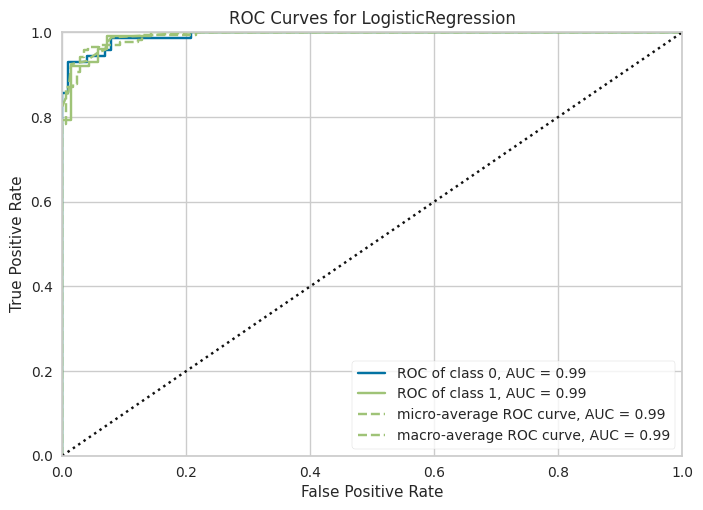

In [8]:
pyc.plot_model(blended, plot='auc')

In [9]:
pred_df = pyc.predict_model(blended, df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9824,0.9955,0.9916,0.9806,0.9861,0.9623,0.9624


In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
!mlflow ui

[2022-08-30 23:10:11 -0300] [12322] [INFO] Starting gunicorn 20.1.0
[2022-08-30 23:10:11 -0300] [12322] [INFO] Listening at: http://127.0.0.1:5000 (12322)
[2022-08-30 23:10:11 -0300] [12322] [INFO] Using worker: sync
[2022-08-30 23:10:11 -0300] [12324] [INFO] Booting worker with pid: 12324
^C
[2022-08-30 23:10:50 -0300] [12322] [INFO] Handling signal: int
[2022-08-30 23:10:51 -0300] [12324] [INFO] Worker exiting (pid: 12324)
